In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('Height of Male and Female by Country 2022.csv', usecols=['Country Name', 'Male Height in Cm', 'Female Height in Cm'])
dataframe = dataframe.rename(columns={'Male Height in Cm':'Male', 'Female Height in Cm':'Female'})
dataframe

,Country Name,Male,Female
0,Netherlands,183.78,170.36
1,Montenegro,183.30,169.96
2,Estonia,182.79,168.66
3,Bosnia and Herzegovina,182.47,167.47
4,Iceland,182.10,168.91
...,...,...,...
194,Mozambique,164.30,155.42
195,Papua New Guinea,163.10,156.89
196,Solomon Islands,163.07,156.79
197,Laos,162.78,153.10


1. Xác định giá trị trung bình (mean) và độ lệch chuẩn (standard deviation) cho chiều cao của các quốc gia trên thế giới (nam, nữ)

In [4]:
dataframe['Male'].append(dataframe['Female']).mean()
dataframe.std()

Male      4.949832
Female    4.076377
dtype: float64

In [5]:
dataframe[['Male', 'Female']].mean()

Male      173.089045
Female    160.942915
dtype: float64

2. Xác định median

In [7]:
dataframe[['Male', 'Female']].quantile([0.25,0.5,0.75])
dataframe[['Male', 'Female']].describe()

,Male,Female
count,199.000000,199.000000
mean,173.089045,160.942915
std,4.949832,4.076377
min,160.130000,150.910000
25%,169.490000,158.240000
50%,173.530000,160.620000
75%,176.510000,163.870000
max,183.780000,170.360000


Male   Female
174.0  161.0     6
175.0  161.0     6
176.0  162.0     6
       163.0     6
171.0  160.0     6
                ..
173.0  162.0     1
174.0  159.0     1
       165.0     1
175.0  159.0     1
184.0  170.0     1
Length: 94, dtype: int64


<AxesSubplot:title={'center':'Frequence distribution of Height'}>

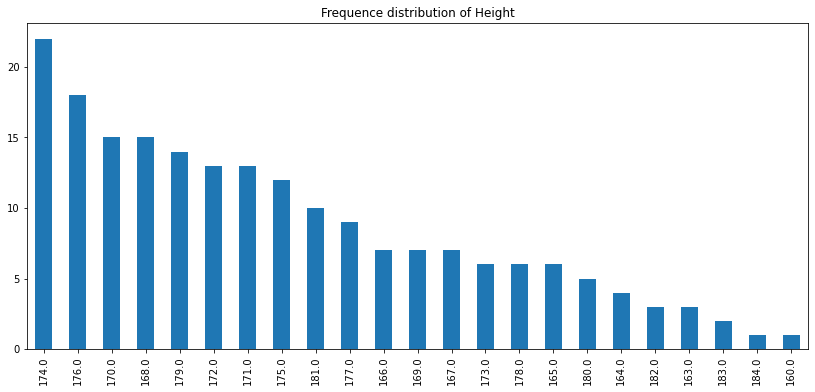

In [9]:
print( dataframe[['Male', 'Female']].round().value_counts())
dataframe_3 = dataframe[['Male', 'Female']].round()
dataframe_3['Male'].value_counts().plot(kind='bar', figsize=(14,6), title='Frequence distribution of Height')
# data = dataframe_3['Female'].value_counts()
# print(data)
# plt.hist(data)



4. Xây dựng khoảng tin cậy 2 phía 95% (95% two-sided confidence interval) cho chiều cao trung bình của nam và nữ

In [8]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(dataframe['Male'])

(173.08904522613065, 172.39709524850275, 173.78099520375855)

5. Mình quan tâm đến các nước trong khu vực Asian. Xây dựng khoảng tin cậy 95% cho chiều cao trung bìn của nam và nữ trong khu vực Asian

In [40]:
from Countries import countries
MaleAsiaCountries = list()
FemaleAsiaCountries = list()
# print(dataframe)
for ind in dataframe.index:
    if dataframe['Country Name'][ind] in countries:
        # MaleAsiaCountries.append(dataframe['Male'][ind])
        MaleAsiaCountries.append(float(dataframe['Male'][ind]))
        
    
print(sum(MaleAsiaCountries)/len(MaleAsiaCountries))
mean_confidence_interval(MaleAsiaCountries)
# AsiaCountries

167.83111111111108


(167.8311111111111, 165.28531537348763, 170.3769068487346)

6. Sử dụng alpha=0.05 (significance level). Kiểm định giả thiết 